# FEM test 1: Uniform Mesh

The finer the mesh used for an FEM solution
the better is the expected accuracy
and the more the computational cost.

We shall examine this statement
for the Poisson's problem in 2D here.

In [1]:
import numpy as np
import triangle as tr

from poisson_2d import Poisson_2d

In [2]:
def u(x,y):
    # return np.where(y == 1, 1, 0)
    # return np.sin(np.pi*x)*np.sin(np.pi*y)
    # return x**2*y**2
    return x*y

def f(x,y):
    # return 0
    # return 2*(np.pi)**2*np.sin(np.pi*x)*np.sin(np.pi*y)
    # return -2*(x**2 + y**2)
    return 0

We will solve the [MMS](https://rajarshi99.github.io/research/notes/mms.pdf)
defined by the above functions $u$ and $f$
in the 2D square domain $-1 < x,y < 1$.
The mesh will be refined
by reducing the diameter of the elements by half
and the problem will be solved with the new mesh.
These solutions will be examined for accuracy
and the time taken.

In [3]:
num_solves = 5
p_2d = [0] * num_solves


for i in range(num_solves):
    num_points_1d = (i+2)**2
    x_1d = np.linspace(-1,1,num_points_1d)
    y_1d = np.linspace(-1,1,num_points_1d)
    x,y = np.meshgrid(x_1d,y_1d)
    x = x.flatten()
    y = y.flatten()

    domain = {'vertices' : np.column_stack((x,y))}
    for key, val in tr.triangulate(domain).items():
        domain[key] = val
    p_2d[i] = Poisson_2d(domain, u, f)
    p_2d[i].sol_FEM()

Let us view one of the numerical solutions.

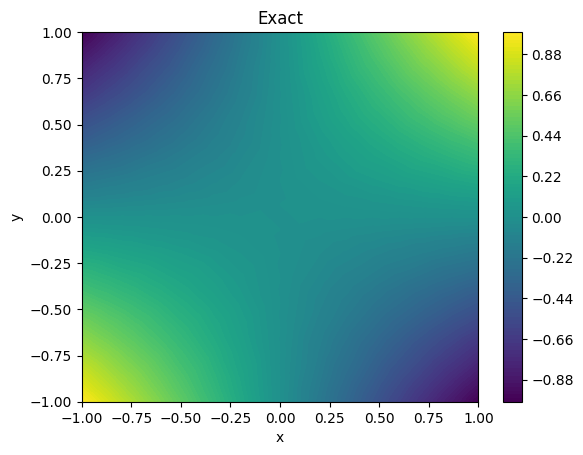

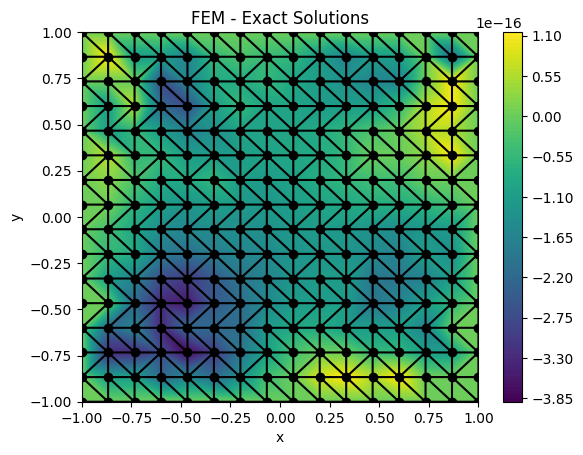

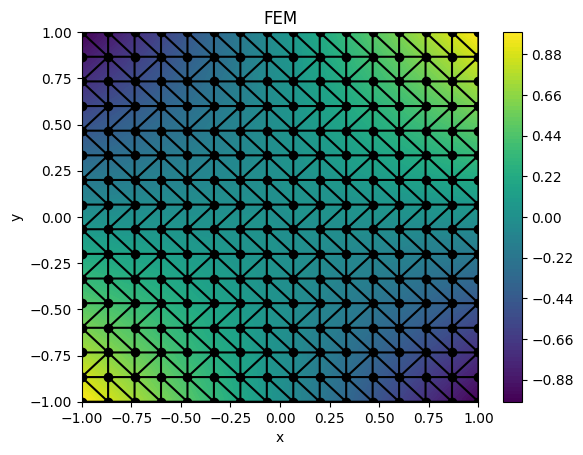

The time taken in s for the job is stored in the list [[0.061894893646240234, 'Forming K and f as dict'], [0.0904088020324707, 'Forming K and f the global quantities'], [0.2679271697998047, 'Calling linear solver'], [8.797645568847656e-05, 'Assembling u_sol']]


In [4]:
i = 2

x = p_2d[i].x
y = p_2d[i].y

u_exact = u(x,y)
u_sol = p_2d[i].u_sol
p_2d[i].plot_on_mesh(u_exact, title = "Exact", plot_with_lines = False)
p_2d[i].plot_on_mesh(u_sol - u_exact, title = "FEM - Exact Solutions")
p_2d[i].plot_sol_on_mesh(title = "FEM")

print("The time taken in s for the job is stored in the list", p_2d[i].time_logs)

Find the diam h and rho of each element. Refer to page 9 in Mark Ainsworth